## 0.	Module imports

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library

%matplotlib inline

## 1.	Data Loading

In [28]:
TRAIN_PATH = os.path.join("..", "input", "train.csv")
TEST_PATH = os.path.join("..", "input", "test.csv")

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [3]:
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Show the columns in the dataset

## 2.	Data exploration

In [4]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


It seems that there are outliers in the "trip_duration"

In [5]:
train.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

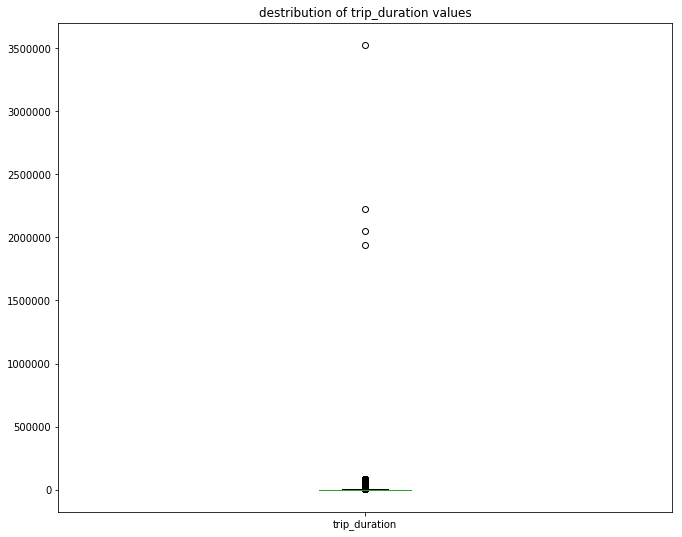

In [6]:
plt.subplots(figsize=(11,9))
plt.title("destribution of trip_duration values")
train["trip_duration"].plot.box()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## 3.	Data preprocessing

I want to ignore some values that I consider to be outliers and that can bias my prediction.

And remove the case we have 0 passenger

In [8]:
train = train[train['passenger_count']>= 1]

we don't take 0 passenger

In [9]:
train = train[train['trip_duration']>= 90 ]
train = train[train['trip_duration']<= 10800 ]

Let's take only : 

the duration that are less than 3hours, 3*3600 = 10800s

and more than 1min30, 90s

we will ignore 2112 lines + 15799 lines = 17911 lines

we will ignore 1.23% of the total of our data set

### we remove outliers from altitude and longetude

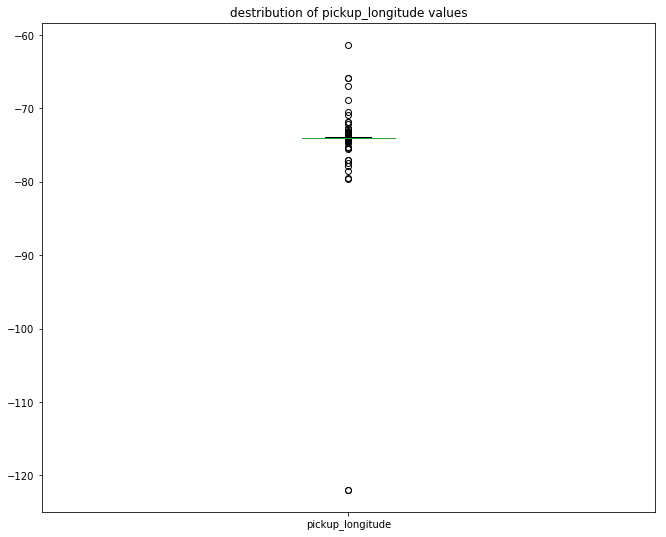

In [10]:
plt.subplots(figsize=(11,9))
plt.title("destribution of pickup_longitude values")
train["pickup_longitude"].plot.box()

In [11]:
train = train.loc[train['pickup_longitude']> -80]

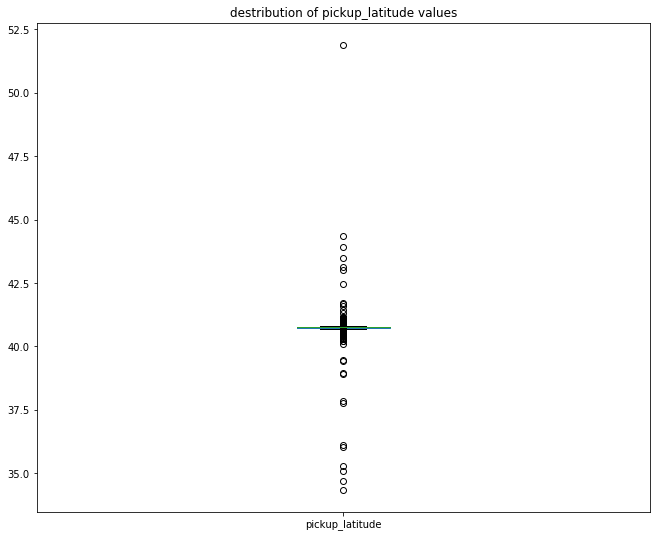

In [12]:
plt.subplots(figsize=(11,9))
plt.title("destribution of pickup_latitude values")
train["pickup_latitude"].plot.box()

In [13]:
train = train.loc[train['pickup_latitude']< 44]

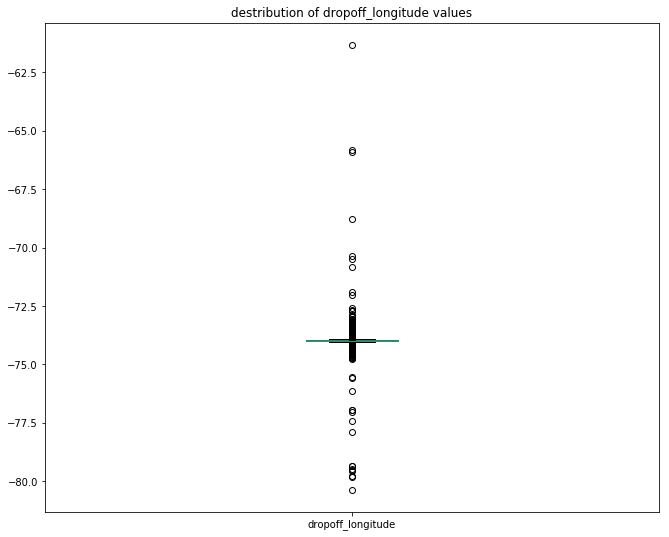

In [14]:
plt.subplots(figsize=(11,9))
plt.title("destribution of dropoff_longitude values")
train["dropoff_longitude"].plot.box()

In [15]:
train = train.loc[train['dropoff_longitude']> -90]

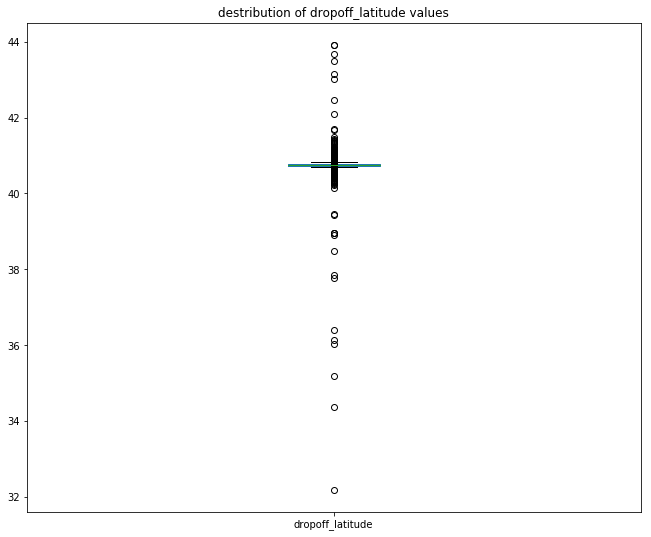

In [16]:
plt.subplots(figsize=(11,9))
plt.title("destribution of dropoff_latitude values")
train["dropoff_latitude"].plot.box()

In [17]:
train = train.loc[train['dropoff_latitude']> 34]

## 4.	Features engineering 

We convert string to date

In [18]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

Creation of a new column hour

In [19]:
train['hour'] = train.loc[:,'pickup_datetime'].dt.hour;
test['hour'] = test.loc[:,'pickup_datetime'].dt.hour;

## Features engineering

In [20]:
train['dist'] = (abs(train['pickup_latitude']-train['dropoff_latitude'])
                        + abs(train['pickup_longitude']-train['dropoff_longitude']))
test['dist'] = (abs(test['pickup_latitude']-test['dropoff_latitude'])
                        + abs(test['pickup_longitude']-test['dropoff_longitude']))

In [21]:
y_train = train["trip_duration"]
X_train = train[["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "dist", "hour" ]]

## 5.	Choice of a validation method

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

## 6.	Selection of models

In [22]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit

In [ ]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

In [ ]:
rfr = RandomForestRegressor(n_estimators=10,min_samples_leaf=100, min_samples_split=150)
rfr.fit(X_train, y_train)

In [ ]:
cv = ShuffleSplit(n_splits=4, test_size=0.8, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring= 'neg_mean_squared_log_error')

In [ ]:
cv_scores

## 7.	Training of the model

In [24]:
m = RandomForestRegressor(n_estimators=10,min_samples_leaf=100, min_samples_split=150)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=150,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## 8.	Prediction

In [25]:
X_test = test[["vendor_id", "passenger_count","pickup_longitude", "pickup_latitude","dropoff_longitude","dropoff_latitude","dist", "hour"]]
prediction = m.predict(X_test)
prediction

array([ 828.95378789,  576.44035017,  569.45998114, ..., 1363.46613384,
       1735.93410184, 1071.79635185])

In [27]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,dist
id,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,0.026695
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,0.028984
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,0.019337
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,0.071789
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,0.014290


## 9.	Prediction submissions

In [29]:
my_submission = pd.DataFrame({'id': test.id, 'trip_duration': prediction})
my_submission.head()

,id,trip_duration
0,id3004672,828.953788
1,id3505355,576.440350
2,id1217141,569.459981
3,id2150126,929.606912
4,id1598245,368.744587


In [30]:
my_submission.to_csv('submission.csv', index=False)